**Rajneesh Pandey, 106119100**

**NLP Assignment 2 : Sentiment Analysis - Classify the sentiment of sentences from the dataset**

**Developing Machine Learning Models using TF - IDF as feature extraction / representation**

**Load the required libraries**

In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [2]:
!pip install scikit-plot

**Load Trainig and testing dataset**

In [ ]:
df = pd.read_csv("/data/train.txt", sep="\t")

In [ ]:
df_test = pd.read_csv("/data/test.txt", sep="\t")

**Preview of datasets**

In [13]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [14]:
df_test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


**Creating the TF - IDF vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(df['Phrase'].values) + list(df_test['Phrase'].values)

vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(df['Phrase'])
test_vectorized = vectorizer.transform(df_test['Phrase'])

In [16]:
print("Train set dimensions after applying TF-IDF vectorizer:")
np.shape(train_vectorized)

Train set dimensions after applying TF-IDF vectorizer:


(156060, 301627)

In [ ]:
X = train_vectorized
y = df.Sentiment.values


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import time

# split the data into 80:20 for training and validating.
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

In [ ]:

ml_default_performance_metrics_df = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['LogisticRegression', 'DecisionTreeClassifier', 'ExtraTreesClassifier', 'RandomForestClassifier', 'LinearSVC', 'BernoulliNB', 'MultinomialNB', 'KNeighborsClassifier'])

**Machine learning techniques used**

**1. Multinomial Logistic Regression**

              precision    recall  f1-score   support

           0       0.62      0.16      0.26      1414
           1       0.56      0.33      0.42      5455
           2       0.65      0.91      0.76     15917
           3       0.60      0.43      0.50      6585
           4       0.68      0.21      0.32      1841

    accuracy                           0.63     31212
   macro avg       0.62      0.41      0.45     31212
weighted avg       0.62      0.63      0.60     31212


accuracy_score 0.631840317826477

Weighted Averaged validation metrics
precision_score 0.6232831390820265
recall_score 0.631840317826477
f1_score 0.5951997402747816


elapsed time in seconds:  19.067740440368652



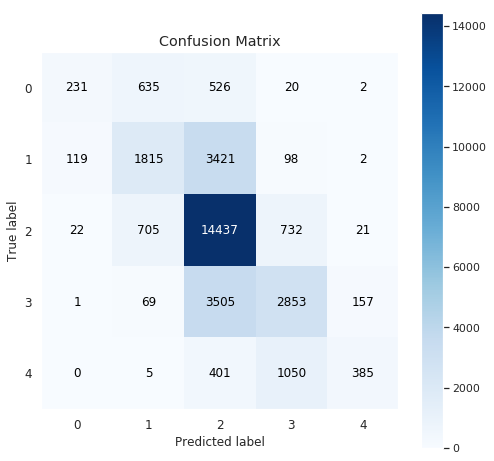

In [41]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

clf_logistic_regression = LogisticRegression(multi_class='ovr', solver='sag', random_state=42)
clf_logistic_regression.fit(xtrain, ytrain)
predictions = clf_logistic_regression.predict(xvalid)

print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


ml_default_performance_metrics_df.loc['LogisticRegression']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['LogisticRegression']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['LogisticRegression']['F1-score'] = f1_score(yvalid, predictions, average='micro')


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

**Multinomial Logistic Regression results in a good accuracy of 63% and F1 score of 59%**

**2. Multinomial NB**


Evaluation of MultinomialNB with train-test split:
              precision    recall  f1-score   support

           0       0.76      0.04      0.07      1414
           1       0.57      0.25      0.35      5455
           2       0.61      0.93      0.74     15917
           3       0.59      0.39      0.47      6585
           4       0.76      0.05      0.10      1841

    accuracy                           0.61     31212
   macro avg       0.66      0.33      0.35     31212
weighted avg       0.62      0.61      0.55     31212


accuracy_score 0.6064654620017942

Weighted Averaged validation metrics
precision_score 0.6150381651913431
recall_score 0.6064654620017942
f1_score 0.5463158424084111


elapsed time in seconds:  0.35625147819519043



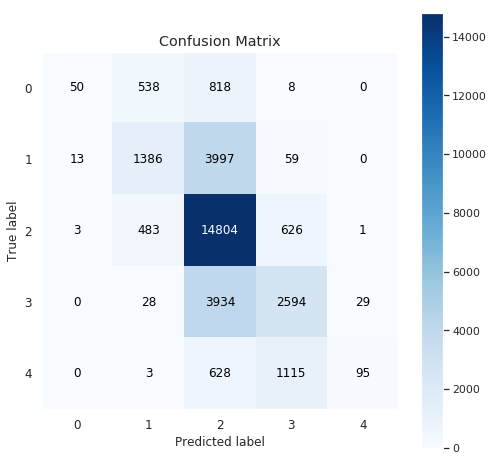

In [47]:
from sklearn.naive_bayes import MultinomialNB

start_time = time.time()
    
print()
print("Evaluation of MultinomialNB with train-test split:")

clf_MultinomialNB = MultinomialNB()
clf_MultinomialNB.fit(xtrain, ytrain)
predictions = clf_MultinomialNB.predict(xvalid)
print(classification_report(yvalid, predictions))

print()
print("accuracy_score", accuracy_score(yvalid, predictions))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions, average='weighted'))
print("recall_score", recall_score(yvalid, predictions, average='weighted'))
print("f1_score", f1_score(yvalid, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['MultinomialNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['MultinomialNB']['accuracy'] = accuracy_score(yvalid, predictions)
ml_default_performance_metrics_df.loc['MultinomialNB']['F1-score'] = f1_score(yvalid, predictions, average='weighted')

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions)


print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

**Multinomail NB results in a accuracy of 61% and F1 score 55%**

**Logistic Regression Tuning**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
print("LogisticRegression grid Search:")

clf_logistic_regression_grid = LogisticRegression(multi_class = 'ovr', random_state=42)

X = train_vectorized
y = df.Sentiment.values

xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2, shuffle=True)

gsc_logistic_regression = GridSearchCV(
    estimator=clf_logistic_regression_grid,
    param_grid={
        'solver': ['newton-cg', 'sag', 'saga'],
        'C': [10e-1, 10e-2, 1, 10],
        'tol': [10e-4, 10e-3, 10e-2, 10e-1, 10e-0],
    },
    scoring='accuracy',
    cv=2
)

grid_result_logistic_regression = gsc_logistic_regression.fit(xtrain, ytrain)

print()
print("LogisticRegression best parameters and score")
print("Best score: %f using %s" % (grid_result_logistic_regression.best_score_, grid_result_logistic_regression.best_params_))

prediction_tuned_logistic_regression = grid_result_logistic_regression.predict(xvalid)
print("accuracy score after tuning:", accuracy_score(yvalid, prediction_tuned_logistic_regression))

ml_tuning_performance_metrics_df.loc['LogisticRegression']['training-time'] = time.time() - start_time
ml_tuning_performance_metrics_df.loc['LogisticRegression']['accuracy'] = accuracy_score(yvalid, prediction_tuned_logistic_regression)
ml_tuning_performance_metrics_df.loc['LogisticRegression']['F1-score'] = f1_score(yvalid, prediction_tuned_logistic_regression, average='macro')

print()
print("elapsed time in seconds: ", time.time() - start_time)
print()

LogisticRegression grid Search:

LogisticRegression best parameters and score
Best score: 0.629734 using {'C': 10, 'solver': 'saga', 'tol': 0.1}
accuracy score after tuning: 0.6581443034730232

elapsed time in seconds:  578.2139675617218



**LogisticRegression tuning evaluation**

              precision    recall  f1-score   support

           0       0.51      0.33      0.40      1414
           1       0.55      0.52      0.53      5455
           2       0.72      0.82      0.77     15917
           3       0.59      0.53      0.56      6585
           4       0.58      0.37      0.45      1841

    accuracy                           0.66     31212
   macro avg       0.59      0.51      0.54     31212
weighted avg       0.65      0.66      0.65     31212


accuracy_score 0.6581443034730232

Weighted Averaged validation metrics
precision_score 0.6468831589744172
recall_score 0.6581443034730232
f1_score 0.6481980588834843



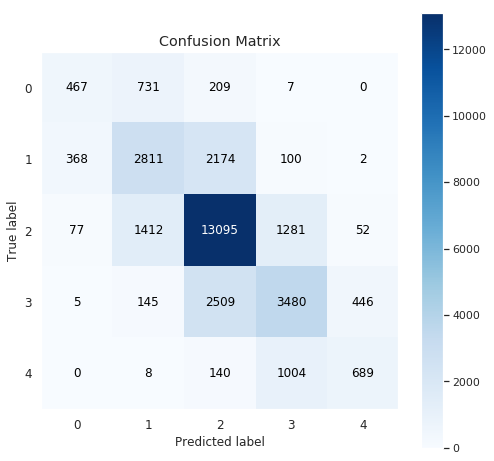

In [27]:
predictions_tuned_logistic_regression = grid_result_logistic_regression.predict(xvalid)

print(classification_report(yvalid, predictions_tuned_logistic_regression))

print()
print("accuracy_score", accuracy_score(yvalid, predictions_tuned_logistic_regression))

print()
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(yvalid, predictions_tuned_logistic_regression, average='weighted'))
print("recall_score", recall_score(yvalid, predictions_tuned_logistic_regression, average='weighted'))
print("f1_score", f1_score(yvalid, predictions_tuned_logistic_regression, average='weighted'))


print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yvalid, predictions_tuned_logistic_regression)

**In Logistic Regression tuning also we cannot see any improvement in accuracy and F1 score**

**ML Predictions with Test Set**

In [ ]:

df_test = pd.read_csv("/content/test.tsv", sep="\t")

test_vectorized = vectorizer.transform(df_test['Phrase'])

predictions_tuned_test_linear_svc = grid_result_linear_svc.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_tuned_test_linear_svc
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_tuned_linear_svc.csv',index=False)

predictions_tuned_test_logistic_regression = grid_result_logistic_regression.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_tuned_test_logistic_regression
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_tuned_logistic_regression.csv',index=False)

predictions_tuned_test_extra_trees = grid_result_extra_trees.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_tuned_test_extra_trees
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_tuned_extra_trees.csv',index=False)

predictions_tuned_test_random_forest = grid_result_random_forest.predict(test_vectorized)
submission = pd.DataFrame()
submission['PhraseId'] = df_test.PhraseId
submission['Sentiment'] = predictions_tuned_test_random_forest
#submission['Sentiment'] = submission.Sentiment.astype(int)
submission.to_csv('submission_tuned_random_forest.csv',index=False)